In [70]:
from sklearn.cluster import KMeans
import numpy as np
X = [[1,1],[1.5,2],[3,4],[5,7],[3.5,5],[4.5,5],[3.5,4.5]]
print(np.array(X).shape)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

(7, 2)
[1 1 0 0 0 0 0]
[[3.9  5.1 ]
 [1.25 1.5 ]]


[[1.16666667 2.13333333]
 [5.5        6.        ]
 [1.5        6.        ]]
[[1.16666667 2.13333333]
 [5.5        6.        ]
 [1.5        6.        ]]
[[1.16666667 2.13333333]
 [5.5        6.        ]
 [1.5        6.        ]]
[[1.16666667 2.13333333]
 [5.5        6.        ]
 [1.5        6.        ]]
['slategray', 'darkviolet', 'peachpuff', 'brown', 'yellowgreen', 'cadetblue', 'tomato', 'darkturquoise', 'lightsteelblue', 'indianred', 'navy', 'floralwhite', 'mediumslateblue', 'ivory', 'lightslategray', 'blanchedalmond', 'crimson', 'azure', 'lemonchiffon', 'saddlebrown', 'darkkhaki', 'cornsilk', 'tan', 'palegreen', 'gray', 'mediumturquoise', 'darksalmon', 'purple', 'violet', 'whitesmoke', 'darkgreen', 'pink', 'orchid', 'sandybrown', 'grey', 'mediumaquamarine', 'lightgrey', 'papayawhip', 'mediumvioletred', 'seashell', 'khaki', 'mediumpurple', 'mediumseagreen', 'lightslategrey', 'olivedrab', 'honeydew', 'blue', 'darkslategray', 'limegreen', 'seagreen', 'burlywood', 'lightgreen', 'rebecca

(0.775, 5.725, 1.1199999999999999, 7.28)

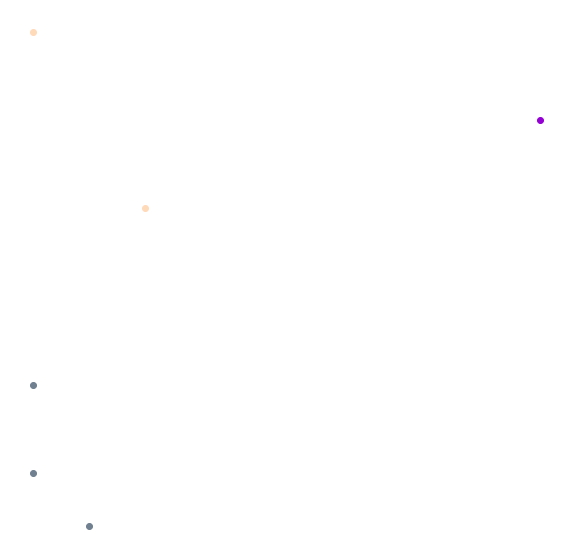

In [71]:
import numpy as np
from numpy.linalg import norm 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
class Kmeans():
    """Kmeans _summary_
    """
    def __init__(self,X,no_of_clusters: int,init_centeroids=None,epsilon=0.00000001,iterations=None): # X has number of rows equal obervation, number of columns equals dimnesion X.shape=[obervation,dimension] , add iterations later with epsilon
        """__init__ _summary_

        Parameters
        ----------
        X : list[list[float]]
            design matrix
        no_of_clusters : int
            the number of desired clusters
        init_centeroids : list[list[float]], optional
            _description_, by default None
        """
        np.random.seed(0)
        self.X=np.array(X)
        self.cluster_labels=None
        self.no_of_clusters=no_of_clusters
        self.no_of_dimensions=self.X.shape[1]
        self.no_of_points=self.X.shape[0]
        self.epsilon=epsilon
        self.iterations=iterations
        if init_centeroids==None:
            self.init_centroids=self.init_clusters()
        else:
            assert np.array(init_centeroids).shape==(self.no_of_clusters,self.no_of_dimensions), "Given centroids do not match shape"
            self.init_centroids=init_centeroids
        
    def transform(self):
        labels=self.compute()
        cluster_dict=dict()
        n=0
        for i in range(self.no_of_clusters):
            cluster_dict[i]=[]
            
        while True:
            n+=1
            old_centroids=self.get_centroids().copy()
            for i in range(self.no_of_points):
                #print(labels[i])
                cluster_dict[labels[i][0]].append(self.X[i])
            #print(np.array(cluster_dict[labels[0][0]]))
            for cluster,points in cluster_dict.items():
                self.init_centroids[cluster]=np.mean(np.array(points),axis=0)
                #print(np.mean(np.array(points),axis=0))
            labels=self.compute()
            print(self.get_centroids())
            if np.where(np.isclose(old_centroids, self.get_centroids()))and n>3: # some stupid issue causes nan numbers to appear in early iterations of kmeans
                break
            #if np.where( np.abs(old_centroids-self.get_centroids()) < self.epsilon ):
              #  break
    def compute(self):
        cluster_list=[]
        for i in range(len(self.init_centroids)):
            X=norm(self.X-self.init_centroids[i],2,axis=1).reshape(-1,1)
            cluster_list.append(X)
        self.cluster_labels=np.argmin(np.array(cluster_list),axis=0)
        return self.cluster_labels
    def init_clusters(self): # This function does the job of choosing an approperiate centroid uniformely
        dump=[]
        X_min=np.min(self.X,axis=1)
        X_max=np.max(self.X,axis=1)
        
        for i in range(self.no_of_dimensions):
            dump.append(np.random.uniform(size=(self.no_of_clusters),low=X_min[i],high=X_max[i]))
    
        return np.array(dump).T
    def evaluate(self): # evaluate the choice of clusters number using sum of squared distance for each cluster
        return None
    def get_centroids(self):
        return self.init_centroids
    def get_cluster_labels(self):
        return self.cluster_labels
    def get_points(self):
        return self.X
s=Kmeans([[1,2],[1.5,1.4],[1,3],[1,7],[2,5],[5.5,6]],3)
s.transform()
labels=s.get_cluster_labels()
points=s.get_points()
fig=plt.figure(figsize=(10,10))
colors=list(mcolors.CSS4_COLORS.keys())
random.shuffle(colors)
print(colors)
for i,j in enumerate(points):
    #print(labels[i])
    plt.scatter(j[0],j[1],color=colors[labels[i][0]])
plt.axis("off")
#print(s.get_cluster_labels())